In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def click(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        img1_corners.append([x, y])

In [67]:
# reading the images
img1 = cv2.imread('image1.jpg', 1) 

img2 = cv2.imread('image2.jpg', 1)

img3 = cv2.imread('image3.jpeg', 1)

### Order to choose the corners:
Start from bottom-left, followed by top-left, top-right, and bottom-right to select the corners.
The remaining 8 points selected approximately (eyeballed) by me such that selected points were:
1) Midpoints of the sides of the paintings
2) Points on both diagonals of the painting representing the 0.25 of diagonal from each corner.

The results in both instances were decently good.

### Or you could uncomment the appropriate line from the next block. It contains the corners preselected.

In [37]:
img1_corners = []

cv2.imshow('image', img1) 

# setting mouse hadler for the image 
# and calling the click_event() function 
cv2.setMouseCallback('image', click) 

cv2.waitKey(0)   
cv2.destroyAllWindows()

In [38]:
# For 4 corners only
# img1_corners = [[566, 1094], [532, 501], [935, 463], [961, 1151]]

# For midpoints for sides
# img1_corners = [[568, 1093], [534, 504], [933, 464], [960, 1148], [552, 795], [722, 487], [948, 814], [753, 1121]]

# For midpoints of diagonals
# img1_corners = [[567, 1092], [536, 505], [932, 467], [961, 1149], [673, 933], [659, 667], [818, 664], [818, 937]]

### Uncomment appropriate set of points from below block based on points selected earlier:

In [39]:
img2_size = img2.shape

# For 4 corners only
# img2_corners = [[0, img2_size[1]], 
#                 [0, 0], 
#                 [img2_size[0], 0],
#                 [img2_size[0], img2_size[1]]
#                ]

# For midpoints of sides
# img2_corners = [[0, img2_size[1]], 
#                 [0, 0], 
#                 [img2_size[0], 0],
#                 [img2_size[0], img2_size[1]],
#                 [0, img2_size[1]/2], 
#                 [img2_size[0]/2, 0],
#                 [img2_size[0], img2_size[1]/2],
#                 [img2_size[0]/2, img2_size[1]]
#                ]

# For midpoints of diagonals
img2_corners = [[0, img2_size[1]], 
                [0, 0], 
                [img2_size[0], 0],
                [img2_size[0], img2_size[1]],
                [img2_size[0]/4, img2_size[1]*3/4],
                [img2_size[0]/4, img2_size[1]/4],
                [img2_size[0]*3/4, img2_size[1]/4],
                [img2_size[0]*3/4, img2_size[1]*3/4],
               ]

In [68]:
# To plot the images right (OpenCV(BGR) -> Matplotlib(RGB))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

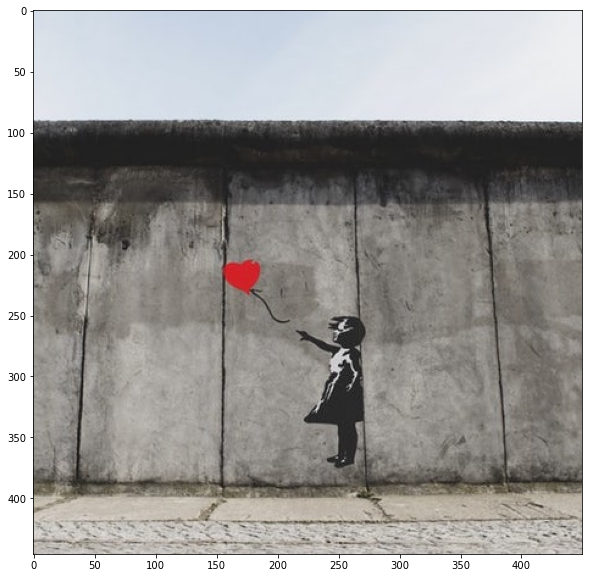

In [41]:
plt.figure(figsize=(10, 10))
plt.imshow(img2)
plt.show()

In [42]:
# Calculating Homography Matrix
t = []
for i in range(0, len(img1_corners)):
    t.append([img1_corners[i][0]])
    t.append([img1_corners[i][1]])
    
P = []
for i in range(0, len(img1_corners)):
    P.append([img2_corners[i][0], img2_corners[i][1], 1, 0, 0, 0, -img2_corners[i][0]*img1_corners[i][0], -img2_corners[i][1]*img1_corners[i][0], -img1_corners[i][0]])
    P.append([0, 0, 0, img2_corners[i][0], img2_corners[i][1], 1, -img2_corners[i][0]*img1_corners[i][1], -img2_corners[i][1]*img1_corners[i][1], -img1_corners[i][1]])


In [43]:
U, S, Vh = np.linalg.svd(np.array(P))
L = Vh[-1,:] / Vh[-1,-1]
H = L.reshape(3, 3)

In [44]:
H

array([[ 5.22910122e-01,  1.18050377e-02,  5.53871647e+02],
       [-2.52583055e-01,  1.19809307e+00,  5.17547692e+02],
       [-3.30218123e-04, -5.40184342e-05,  1.00000000e+00]])

In [45]:
img_out = cv2.warpPerspective(img2, H, (img1.shape[1], img1.shape[0]))

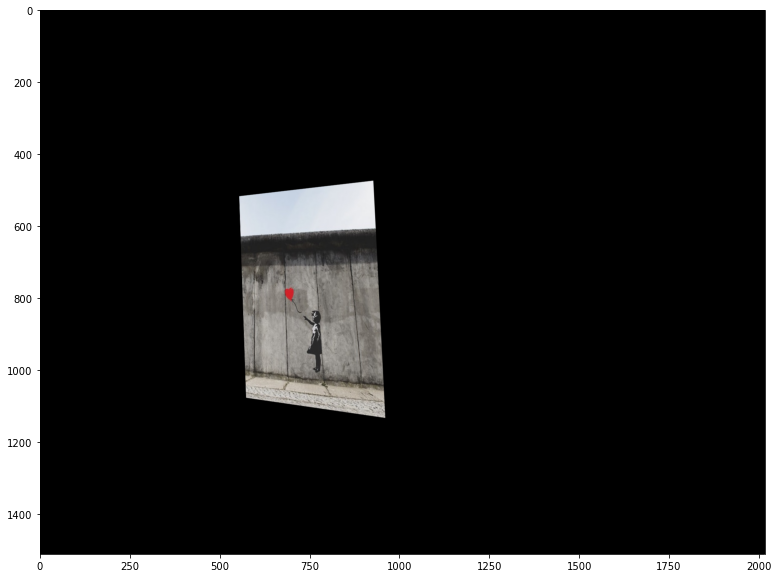

In [46]:
plt.figure(figsize=(15, 10))
plt.imshow(img_out)
plt.show()

In [47]:
mask = np.zeros(img1.shape, dtype=np.uint8)

roi_corners2 = np.int32(img1_corners)

channel_count2 = img1.shape[2]  
ignore_mask_color2 = (255,)*channel_count2

cv2.fillConvexPoly(mask, roi_corners2, ignore_mask_color2)

mask = cv2.bitwise_not(mask)
masked_image = cv2.bitwise_and(img1, mask)

#Using Bitwise or to merge the two images
final = cv2.bitwise_or(img_out, masked_image)

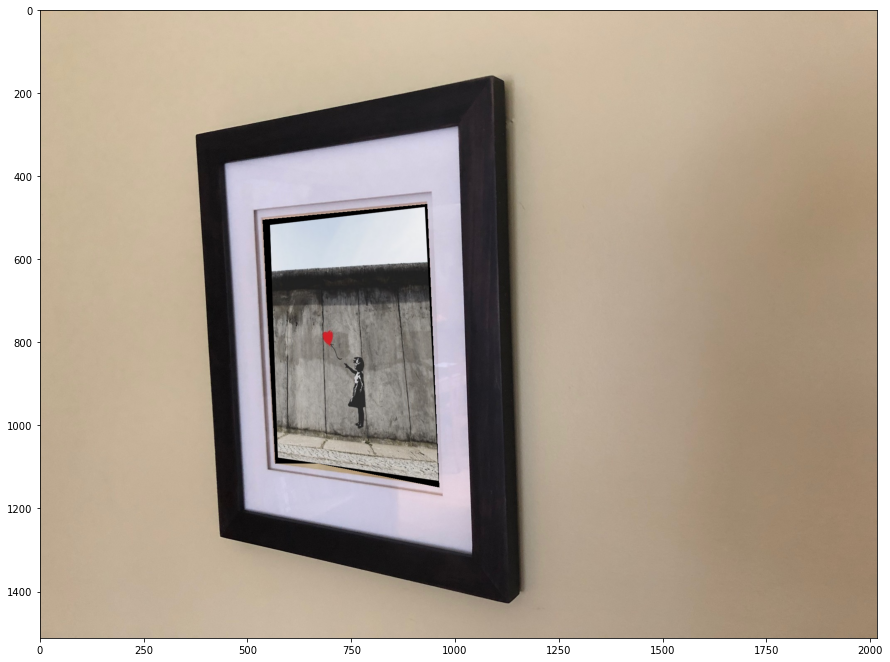

In [48]:
# cv2.imshow('Output', final) 
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# plt.axis("off")
plt.figure(figsize=(15, 20))
plt.imshow(final)
plt.show()

In [49]:
# cv2.imwrite('Output1a1.png',final)

## Change in computation of H matrix:
The problem in this part of the project is an overconstrained problem. We have more points than we need. Hence, to solve this, we use SVD for dimensionality reduction to reduce this over-constrained matrix that we get, into a 3x3 H matrix.

## Differences in the H matrix:
If we notice the H matrices between part 1 and 2 of this project, the magnitudes of the elements of the H matrix are very close to each other. This is despite the fact that we choose double the points in part 2. This is because SVD reduces the dimensionality of the problem without much degradation of the quality of the points themselves. This is very much visible from the minimal changes in the H matrix and hence naturally in the final image as well.

## Calculations on a new image:

In [69]:
img3_size = img3.shape

# For 4 corners only
# img2_corners = [[0, img2_size[1]], 
#                 [0, 0], 
#                 [img2_size[0], 0],
#                 [img2_size[0], img2_size[1]]
#                ]

# For midpoints of sides
# img2_corners = [[0, img2_size[1]], 
#                 [0, 0], 
#                 [img2_size[0], 0],
#                 [img2_size[0], img2_size[1]],
#                 [0, img2_size[1]/2], 
#                 [img2_size[0]/2, 0],
#                 [img2_size[0], img2_size[1]/2],
#                 [img2_size[0]/2, img2_size[1]]
#                ]

# For midpoints of diagonals
img3_corners = [[0, img3_size[1]], 
                [0, 0], 
                [img3_size[0], 0],
                [img3_size[0], img3_size[1]],
                [img3_size[0]/4, img3_size[1]*3/4],
                [img3_size[0]/4, img3_size[1]/4],
                [img3_size[0]*3/4, img3_size[1]/4],
                [img3_size[0]*3/4, img3_size[1]*3/4],
               ]

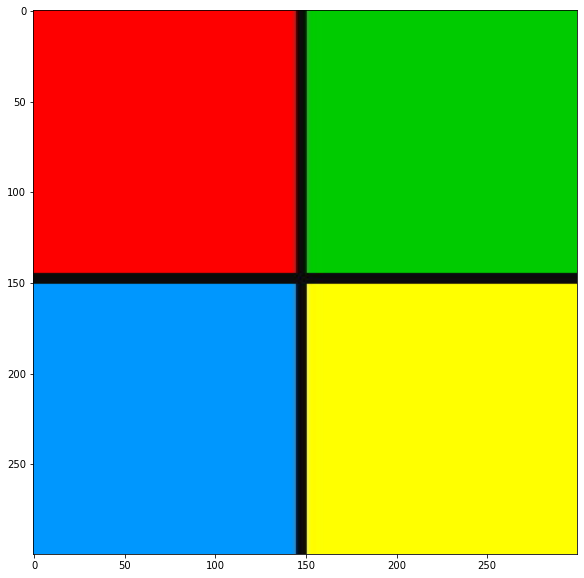

In [70]:
plt.figure(figsize=(10, 10))
plt.imshow(img3)
plt.show()

In [71]:
# Calculating Homography Matrix
t = []
for i in range(0, len(img1_corners)):
    t.append([img1_corners[i][0]])
    t.append([img1_corners[i][1]])
    
P = []
for i in range(0, len(img1_corners)):
    P.append([img3_corners[i][0], img3_corners[i][1], 1, 0, 0, 0, -img3_corners[i][0]*img1_corners[i][0], -img3_corners[i][1]*img1_corners[i][0], -img1_corners[i][0]])
    P.append([0, 0, 0, img3_corners[i][0], img3_corners[i][1], 1, -img3_corners[i][0]*img1_corners[i][1], -img3_corners[i][1]*img1_corners[i][1], -img1_corners[i][1]])


In [72]:
U, S, Vh = np.linalg.svd(np.array(P))
L = Vh[-1,:] / Vh[-1,-1]
H = L.reshape(3, 3)

In [73]:
H

array([[ 7.77393435e-01,  1.77083303e-02,  5.53871607e+02],
       [-3.75506639e-01,  1.79714082e+00,  5.17547652e+02],
       [-4.90924100e-04, -8.10266582e-05,  1.00000000e+00]])

In [74]:
img_out = cv2.warpPerspective(img3, H, (img1.shape[1], img1.shape[0]))

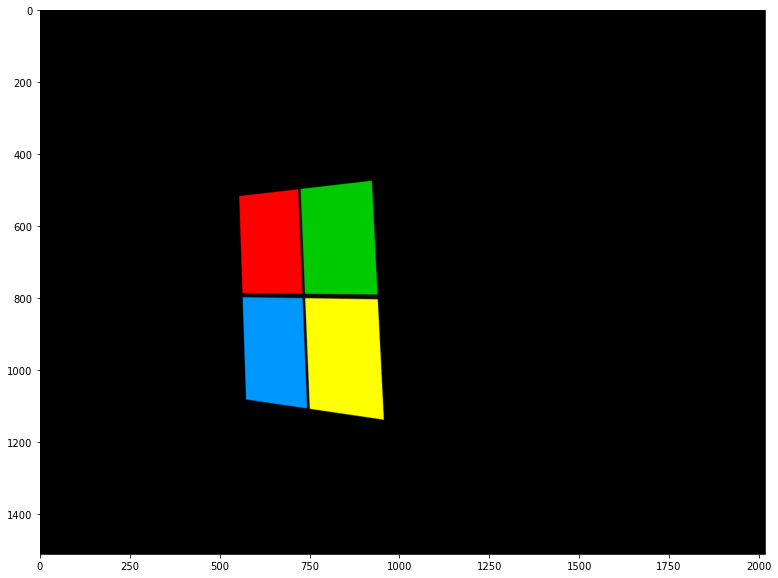

In [75]:
plt.figure(figsize=(15, 10))
plt.imshow(img_out)
plt.show()

In [76]:
mask = np.zeros(img1.shape, dtype=np.uint8)

roi_corners3 = np.int32(img1_corners)

channel_count3 = img1.shape[2]  
ignore_mask_color3 = (255,)*channel_count3

cv2.fillConvexPoly(mask, roi_corners3, ignore_mask_color3)

mask = cv2.bitwise_not(mask)
masked_image = cv2.bitwise_and(img1, mask)

#Using Bitwise or to merge the two images
final = cv2.bitwise_or(img_out, masked_image)

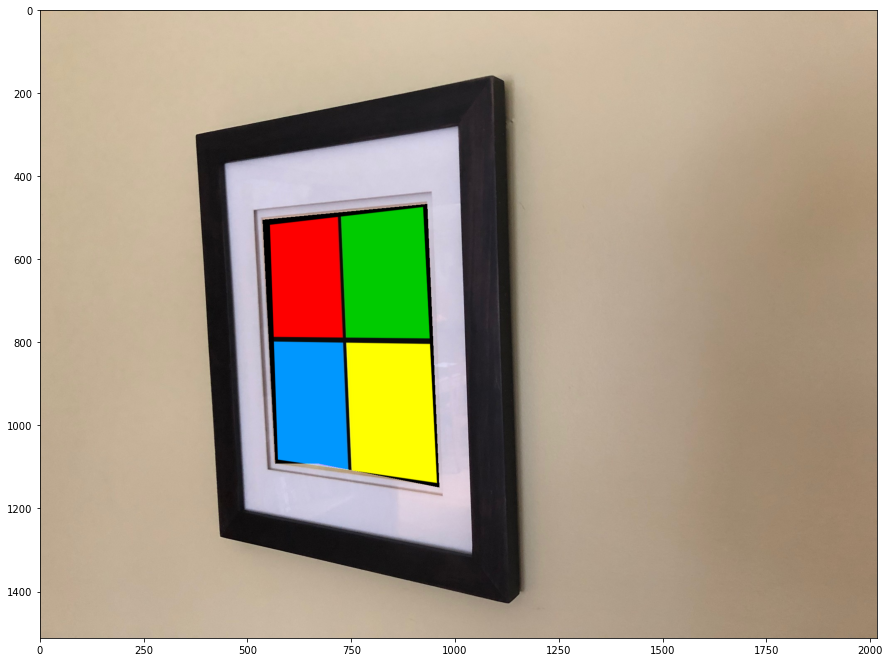

In [77]:
# cv2.imshow('Output', final) 
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# plt.axis("off")
plt.figure(figsize=(15, 20))
plt.imshow(final)
plt.show()

In [ ]:
# cv2.imwrite('Output1a1.png',final)

## The new image:
The new image fits very closely just as the previous image did. But I also tried a rectangular image that way longer on the vertical axis. The image did not fit well in that case. The image began protruding from the bottom of the frame.